In [1]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter
import geopandas as gpd
from shapely.geometry import shape, box, Polygon
from datetime import date

In [2]:
api = SentinelAPI("sjjohnst", "Atmosphere1806.")

In [3]:
# Define a small geojson polygon for testing downloading data
small_aoi = gpd.read_file('manaus.geojson')
small_aoi_wkt = small_aoi.geometry.to_wkt().values[0]
print(small_aoi_wkt)

POLYGON ((-60.4852294921875 -3.820408083194941, -59.12841796875 -3.820408083194941, -59.12841796875 -2.70163504794452, -60.4852294921875 -2.70163504794452, -60.4852294921875 -3.820408083194941))


(-40.0, 10.0)

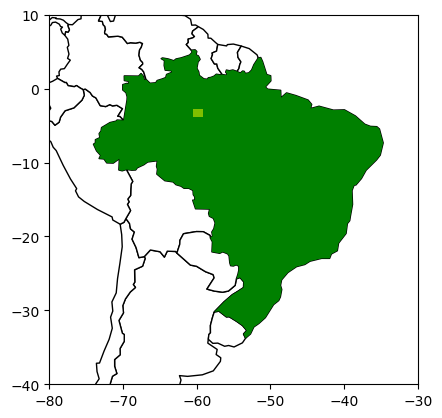

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world.name == "Brazil"]

base = world.plot(color='white', edgecolor='black')
brazil.plot(ax=base, color='green')
small_aoi.plot(ax=base, color='yellow', alpha=0.5)

base.set_xlim((-80, -30))
base.set_ylim((-40, 10))

# world.explore()

In [8]:
products = api.query(small_aoi_wkt,
                     producttype='GRD',
                     platformname='Sentinel-1',
                     date=(date(2022, 9, 1), date(2022, 10, 13)))

In [10]:
products_df = api.to_dataframe(products)
products_df_sorted = products_df.sort_values(['ingestiondate'], ascending=[False])
products_df_sorted.head(6)

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,gmlfootprint,footprint,uuid
87d5bce3-6f9e-429e-92ea-0f6b72ef3219,S1A_IW_GRDH_1SDV_20221012T094001_20221012T0940...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-12T09:40:01.146Z, Instrument: SA...",false,2022-10-12 09:40:01.146,2022-10-12 09:40:26.145,2022-10-12 11:58:54.914,355841,...,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-58.847973 -5.234097, -58.5229...",87d5bce3-6f9e-429e-92ea-0f6b72ef3219
c94ffb88-af73-402a-977a-d555acee6e87,S1A_IW_GRDH_1SDV_20221012T093936_20221012T0940...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-12T09:39:36.146Z, Instrument: SA...",false,2022-10-12 09:39:36.146,2022-10-12 09:40:01.145,2022-10-12 11:56:33.335,355841,...,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-58.522907 -3.722962, -58.2018...",c94ffb88-af73-402a-977a-d555acee6e87
f37b8cbf-80b7-4715-bc93-db302e2a23a1,S1A_IW_GRDH_1SDV_20221005T094734_20221005T0947...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-05T09:47:34.202Z, Instrument: SA...",false,2022-10-05 09:47:34.202,2022-10-05 09:47:59.202,2022-10-05 11:56:54.518,354964,...,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-60.375858 -2.777949, -60.0565...",f37b8cbf-80b7-4715-bc93-db302e2a23a1
1cef1d05-522d-456b-ba68-938bcb878d9d,S1A_IW_GRDH_1SDV_20221005T094759_20221005T0948...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-10-05T09:47:59.203Z, Instrument: SA...",false,2022-10-05 09:47:59.203,2022-10-05 09:48:24.201,2022-10-05 11:53:53.431,354964,...,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-60.698582 -4.289384, -60.3758...",1cef1d05-522d-456b-ba68-938bcb878d9d
e52d3052-bf97-4e57-8300-a1329e1a110a,S1A_IW_GRDH_1SDV_20220930T094001_20220930T0940...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-09-30T09:40:01.333Z, Instrument: SA...",false,2022-09-30 09:40:01.333,2022-09-30 09:40:26.331,2022-09-30 11:57:21.542,354329,...,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-58.849495 -5.234039, -58.5244...",e52d3052-bf97-4e57-8300-a1329e1a110a
af85458c-9d71-464c-9c26-09b875917091,S1A_IW_GRDH_1SDV_20220930T093936_20220930T0940...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-09-30T09:39:36.333Z, Instrument: SA...",false,2022-09-30 09:39:36.333,2022-09-30 09:40:01.331,2022-09-30 11:57:19.369,354329,...,Sentinel-1,2014-016A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,"<gml:Polygon srsName=""http://www.opengis.net/g...","MULTIPOLYGON (((-58.524422 -3.722904, -58.2033...",af85458c-9d71-464c-9c26-09b875917091


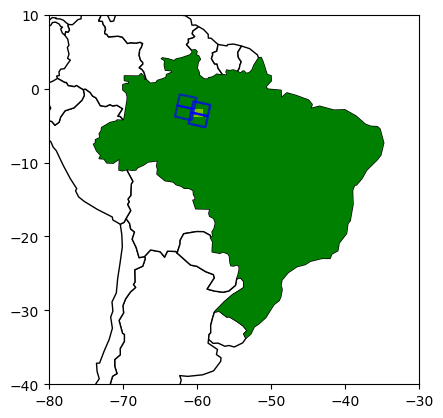

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world.name == "Brazil"]
# brazil = gpd.read_file('gadm41_BRA_shp/gadm41_BRA_0.shp')

base = world.plot(color='white', edgecolor='black')
brazil.plot(ax=base, color='green')
small_aoi.plot(ax=base, color='yellow', alpha=0.5)

base.set_xlim((-80, -30))
base.set_ylim((-40, 10))

footprints = products_df.footprint.values
# base.set_xlim((-80, -30))
# base.set_ylim((-40, 10))
for f in footprints:
    gpd_series = gpd.GeoSeries.from_wkt([f])
    gpd_series.boundary.plot(ax=base, color='blue', alpha=0.3)


In [12]:
from sentinelsat import make_path_filter
path_filter = make_path_filter("*measurement/*", exclude=True)

api.download(products['87d5bce3-6f9e-429e-92ea-0f6b72ef3219'], nodefilter=path_filter)

ServerError: HTTP status 404: UriNotMatchingException : Could not match segment: 'Products('%7B'title':%20'S1A_IW_GRDH_1SDV_20221012T094001_20221012T094026_045407_056E01_71D4',%20'link':%20%22https:'.

In [5]:
from PIL import Image
import os

Image.MAX_IMAGE_PIXELS = None

tiff_directory = "D:\Sam-Johnston\Deforestation_Monitoring\ASF_Datasets\S1A_IW_GRDH_1SDV_20201211T092305_20201211T092330_035636_042B21_B5EA.SAFE\measurement"
im1 = os.path.join(tiff_directory, "s1a-iw-grd-vh-20201211t092305-20201211t092330-035636-042b21-002.tiff")
im2 = os.path.join(tiff_directory, "s1a-iw-grd-vv-20201211t092305-20201211t092330-035636-042b21-001.tiff")

pil_img1 = Image.open(im1)
pil_img2 = Image.open(im2)

In [6]:
import numpy as np
im1_array = np.array(pil_img1)
im2_array = np.array(pil_img2)
im1_array.shape

(16825, 25815)

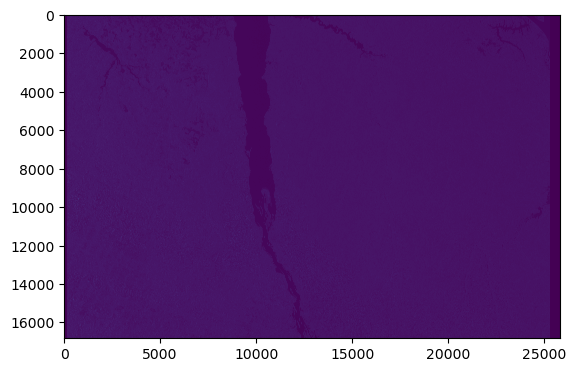

In [7]:
import matplotlib.pyplot as plt
plt.imshow(im1_array)

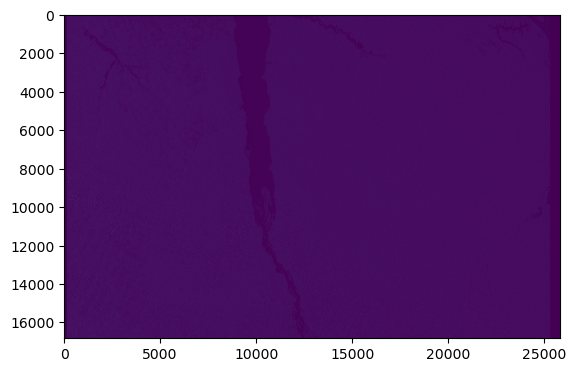

In [8]:
plt.imshow(im2_array)

In [10]:
rg_im = np.stack([im1_array, im2_array, np.zeros_like(im1_array)], axis=-1)
rg_im.shape

(16825, 25815, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


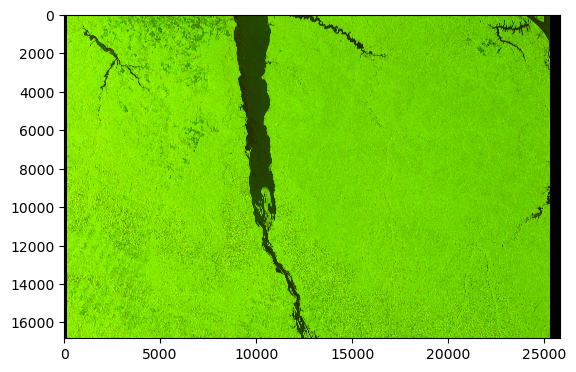

In [11]:
plt.imshow(rg_im)